In [2]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.getcwd())
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", "gtracr"))
# sys.path.append(os.path.join(os.getcwd(), "gtracr"))


from gtracr.trajectory import Trajectory
# from gtracr.utils import spherical_to_cartesian
from gtracr.lib.constants import EARTH_RADIUS

In [3]:
def convert_trajectory_to_cartesian(trajectory_dict):
    r_arr = np.array(trajectory_dict["r"])
    theta_arr = np.array(trajectory_dict["theta"])
    phi_arr = np.array(trajectory_dict["phi"])
    
    x_arr = r_arr * np.sin(theta_arr) * np.cos(phi_arr)
    y_arr = r_arr * np.sin(theta_arr) * np.sin(phi_arr)
    z_arr = r_arr * np.cos(theta_arr)
    
    return x_arr, y_arr, z_arr

In [4]:
traj = Trajectory(
        "p+",
        latitude=0.,
        longitude=0.,
        detector_altitude=100.,
        zenith_angle=0.,
        azimuth_angle=0.,
        particle_altitude=100.,
        rigidity=40.,
        bfield_type="igrf",
        date=1917.15
#         bfield_type="dipole"
#         energy=21.
    )
    # for i in range(10):



In [4]:
%load_ext snakeviz

In [5]:
# result = traj.get_trajectory(max_step=1000000, step_size=1e-6, get_data=True)
result = traj.get_trajectory(dt=1e-5, max_time=0.05, get_data=True, use_unvectorized=False)  # 1000 iterations with dt=1e-5, max_time=0.05s

In [6]:
print(result.keys())

dict_keys(['phi', 'pphi', 'pr', 'ptheta', 'r', 't', 'theta'])


In [7]:
# convert results to cartesian
x_arr, y_arr, z_arr = convert_trajectory_to_cartesian(result)
x_arr /= EARTH_RADIUS
y_arr /= EARTH_RADIUS
z_arr /= EARTH_RADIUS
# print(x_arr)

In [8]:
t_arr = result["t"]
# x_arr = result["x"] / EARTH_RADIUS
# y_arr = result["y"] / EARTH_RADIUS
# z_arr = result["z"] / EARTH_RADIUS

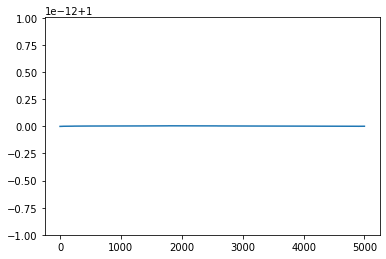

In [9]:
p_arr = np.sqrt(result["pr"]**2. + result["ptheta"]**2. + result["pphi"]**2.)
plt.plot(p_arr / p_arr[0])

In [10]:
# px_arr = result["px"]
# py_arr = result["py"]
# pz_arr = result["pz"]

# p_arr = np.sqrt(px_arr**2. + py_arr**2. + pz_arr**2.)
# plt.plot(p_arr / p_arr[0])

In [11]:
print(traj.particle_escaped)

False


In [12]:
fig_3d = plt.figure()
ax_3d = fig_3d.add_subplot(111, projection="3d")
cm_3d = ax_3d.scatter(x_arr, y_arr, z_arr, c=t_arr, marker='o')
# ax_3d.scatter(x2, y2, z2, c="r", marker='o')
cbar_3d = fig_3d.colorbar(cm_3d, ax=ax_3d)
# plt.colorbar()
# plt.savefig("test.png")
ax_3d.set_xlim([-3, 3])
ax_3d.set_ylim([-3, 3])
ax_3d.set_zlim([-3, 3])
ax_3d.set_xlabel(r"x [$R_E$]")
ax_3d.set_ylabel(r"y [$R_E$]")
ax_3d.set_zlabel(r"z [$R_E$]")
cbar_3d.ax.set_ylabel("Time [s]")

ValueError: Unknown projection '3d'

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'Time [s]')

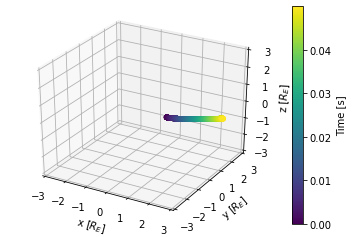

In [23]:
fig_3d = plt.figure()
ax_3d = fig_3d.add_subplot(111, projection="3d")
cm_3d = ax_3d.scatter(x_arr, y_arr, z_arr, c=t_arr, marker='o')
# ax_3d.scatter(x2, y2, z2, c="r", marker='o')
cbar_3d = fig_3d.colorbar(cm_3d, ax=ax_3d)
# plt.colorbar()
# plt.savefig("test.png")
ax_3d.set_xlim([-3, 3])
ax_3d.set_ylim([-3, 3])
ax_3d.set_zlim([-3, 3])
ax_3d.set_xlabel(r"x [$R_E$]")
ax_3d.set_ylabel(r"y [$R_E$]")
ax_3d.set_zlabel(r"z [$R_E$]")
cbar_3d.ax.set_ylabel("Time [s]")

Text(0, 0.5, 'Time [s]')

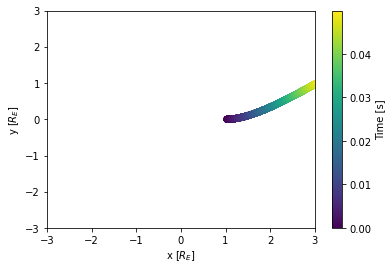

In [24]:
fig_xy, ax_xy = plt.subplots()
cm_xy = ax_xy.scatter(x_arr, y_arr, c=t_arr)
cbar_xy = fig_xy.colorbar(cm_xy, ax=ax_xy)
ax_xy.set_xlim([-3, 3])
ax_xy.set_ylim([-3, 3])
ax_xy.set_xlabel(r"x [$R_E$]")
ax_xy.set_ylabel(r"y [$R_E$]")
cbar_xy.ax.set_ylabel("Time [s]")

Text(0, 0.5, 'Time [s]')

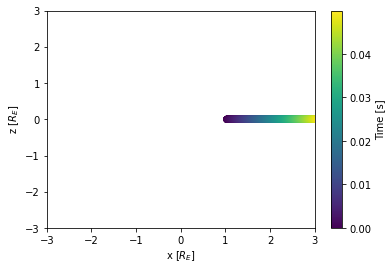

In [25]:
fig_xz, ax_xz = plt.subplots()
cm_xz = ax_xz.scatter(x_arr, z_arr, c=t_arr)
cbar_xz = fig_xz.colorbar(cm_xz, ax=ax_xz)
ax_xz.set_xlim([-3, 3])
ax_xz.set_ylim([-3, 3])
ax_xz.set_xlabel(r"x [$R_E$]")
ax_xz.set_ylabel(r"z [$R_E$]")
cbar_xz.ax.set_ylabel("Time [s]")

Text(0, 0.5, 'Time [s]')

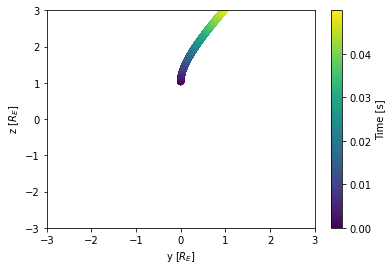

In [15]:
fig_yz, ax_yz = plt.subplots()
cm_yz = ax_yz.scatter(y_arr, x_arr, c=t_arr)
cbar_yz = fig_yz.colorbar(cm_yz, ax=ax_yz)
ax_yz.set_xlim([-3, 3])
ax_yz.set_ylim([-3, 3])
ax_yz.set_xlabel(r"y [$R_E$]")
ax_yz.set_ylabel(r"z [$R_E$]")
cbar_yz.ax.set_ylabel("Time [s]")

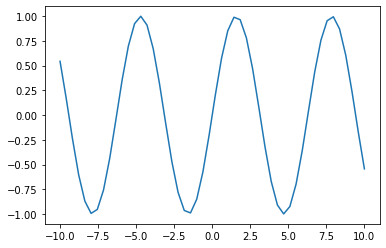

In [27]:
x = np.linspace(-10, 10)
plt.plot(x, np.sin(x))